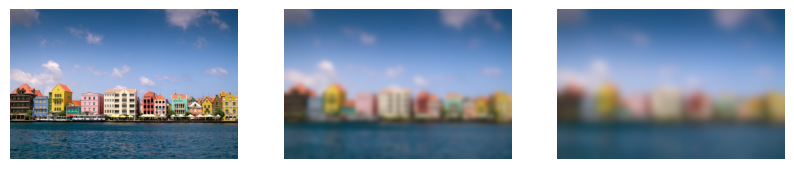

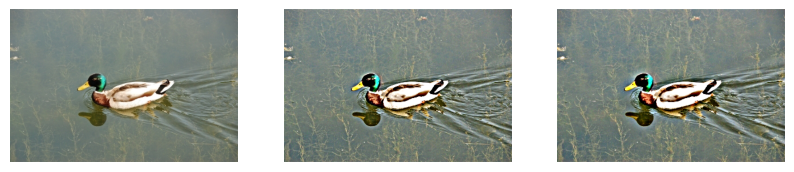

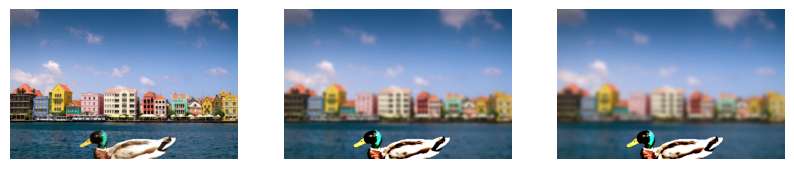

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gaussianSmoothing(img, sigma):
    ksize = int(6*sigma)
    if ksize % 2 == 0:
        ksize += 1
    kernel = cv2.getGaussianKernel(ksize, sigma)
    smoothed = cv2.sepFilter2D(img, -1, kernel, kernel)
    return smoothed

# load the image
img = cv2.imread('houses.jpg')

# apply smoothing for sigma = 3 and sigma = 6
smoothed_3 = gaussianSmoothing(img, 4)
smoothed_6 = gaussianSmoothing(img, 8)

# display the results
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 2))
ax1.imshow(img[:,:,::-1])
ax1.axis('off')
ax2.imshow(smoothed_3[:,:,::-1])
ax2.axis('off')
ax3.imshow(smoothed_6[:,:,::-1])
ax3.axis('off')
plt.show()


def unsharpMasking(img, sigma):
    # apply Gaussian smoothing to the image
    smoothed = gaussianSmoothing(img, sigma)

    # calculate the high-frequency component of the image
    high_freq = img.astype(np.float32) - smoothed.astype(np.float32)

    # add the high-frequency component back to the original image
    sharpened = (img.astype(np.float32) + 1.5 * high_freq).clip(0, 255).astype(np.uint8)

    return sharpened

# load the image
img1 = cv2.imread('duck.jpg')

# apply sharpening for sigma = 3 and sigma = 6
sharpened_3 = unsharpMasking(img1, 4)
sharpened_6 = unsharpMasking(img1, 8)

# display the results
fig, (ax4, ax5, ax6) = plt.subplots(ncols=3, figsize=(10, 2))
ax4.imshow(img1[:,:,::-1])
ax4.axis('off')
ax5.imshow(sharpened_3[:,:,::-1])
ax5.axis('off')
ax6.imshow(sharpened_6[:,:,::-1])
ax6.axis('off')
plt.show()

def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):
    # Get the dimensions of the foreground image and background image
    fgH, fgW = fgImg.shape[:2]
    bgH, bgW = bgImg.shape[:2]

    # Get the position of the top-left corner of the foreground image in the background image
    fgTop, fgLeft = topLeft

    # Calculate the position of the bottom-right corner of the foreground image in the background image
    fgBottom = fgTop + fgH
    fgRight = fgLeft + fgW

    # Create a copy of the background image
    outputImg = bgImg.copy()

    # Loop through each pixel in the foreground mask
    for y in range(fgH):
        for x in range(fgW):
            # If the pixel belongs to the foreground object
            if fgMask[y,x] > 0:
                # Calculate the corresponding position in the background image
                bgX = fgLeft + x
                bgY = fgTop + y

                # Make sure the position is within the bounds of the background image
                if bgX >= 0 and bgX < bgW and bgY >= 0 and bgY < bgH:
                    # Copy the pixel value from the foreground image to the background image
                    outputImg[bgY,bgX] = fgImg[y,x]

    return outputImg

def combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, bgSigma, fgSigma, topLeft):
    smoothedBgImg = gaussianSmoothing(bgImg, bgSigma)
    sharpenedFgImg = unsharpMasking(fgImg, fgSigma)
    combinedImg = combineForegroundBackground(sharpenedFgImg, fgMask, smoothedBgImg, topLeft)

    return combinedImg

fgImg = cv2.imread('duck.jpg')
fgMask = cv2.imread('duck2.png', cv2.IMREAD_GRAYSCALE)

# Load the background image
bgImg = cv2.imread('houses.jpg')
topLeft= (100, 3)
combinedImg4 = combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, 0, 0, topLeft)
combinedImg5 = combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, 2, 6, topLeft)
combinedImg6 = combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, 3, 8, topLeft)

# display the results
fig, (ax7, ax8, ax9) = plt.subplots(ncols=3, figsize=(10, 3))
ax7.imshow(combinedImg4[:,:,::-1])
ax7.axis('off')
ax8.imshow(combinedImg5[:,:,::-1])
ax8.axis('off')
ax9.imshow(combinedImg6[:,:,::-1])
ax9.axis('off')

plt.show()
